# Demo cosmology module of jax_cosmo

In [5]:
import sys
sys.path.insert(0,'../')
import jax
%load_ext autoreload
%autoreload 2

%pylab inline

import jax.numpy as np

from jax_cosmo.cosmology import cosmology

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
cosmo = cosmology()

In [12]:
# Get a k array
k = np.logspace(-3,0)
# Compute transfer function
t = cosmo.T(k)
# Compute the linear power spectrum, minus the growth part
pk = cosmo.pk_prim(k) *  t**2

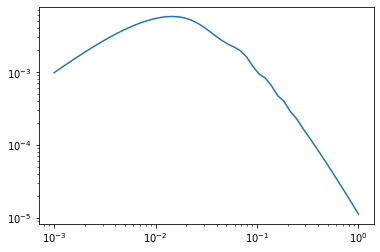

In [13]:
loglog(k, pk)

\o/ Fantastic!

In [22]:
# Now let's try to compute some gradients :-D
def get_pk_loss(Omega_m):
    cosmo.update(Omega_m=Omega_m)
    return np.sum((cosmo.pk_prim(k) * cosmo.T(k)**2 - pk)**2)

In [24]:
grad_pk_loss = jax.grad(get_pk_loss)
grad_pk_loss(0.3)

DeviceArray(0.00109025, dtype=float32)

In [57]:
# Let's try some manual gradient descent
om = 0.2
cosmo.update(Omega_m=0.2)

pks = []
for i in range(10):
    om -= 10*grad_pk_loss(om)
    pks.append(cosmo.pk_prim(k) * cosmo.T(k)**2)

In [58]:
t = cosmo.T(k)
# Compute the linear power spectrum, minus the growth part
pkrec = cosmo.pk_prim(k) *  t**2

Text(0.5, 0, 'k')

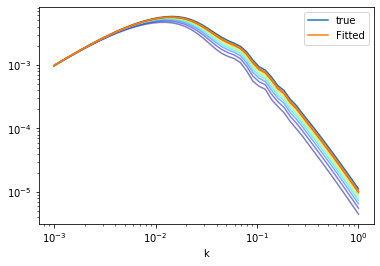

In [60]:
import matplotlib.pylab as plt
colors = plt.cm.jet(np.linspace(0,1,10))

loglog(k, pk, label='true')
for i,v in enumerate(pks):
    loglog(k, v.primal, color=colors[i],alpha=0.5)
loglog(k, pkrec.primal, label='Fitted')
legend()
xlabel('k')